In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [46]:
df = pd.read_csv("daily_data.csv")

df = df[["location_name", "date", "rainfall"]].dropna()
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")

df_loc = df[df["location_name"] == "Auckland"].copy()

start = "1960-01-01"
end   = "1969-12-31"
df_small = df_loc[(df_loc["date"] >= start) & (df_loc["date"] <= end)].copy()

print("Selected rows:", len(df_small))
print("Date range:", df_small["date"].min(), "->", df_small["date"].max())
df_small.head()


Selected rows: 3653
Date range: 1960-01-01 00:00:00 -> 1969-12-31 00:00:00


,location_name,date,rainfall
0,Auckland,1960-01-01,0.0
1,Auckland,1960-01-02,0.0
2,Auckland,1960-01-03,9.2
3,Auckland,1960-01-04,0.0
4,Auckland,1960-01-05,0.0


In [47]:
R_data = df_small["rainfall"].to_numpy()
t = np.arange(len(R_data))

print("R_data min/max:", R_data.min(), R_data.max())


R_data min/max: 0.0 139.4


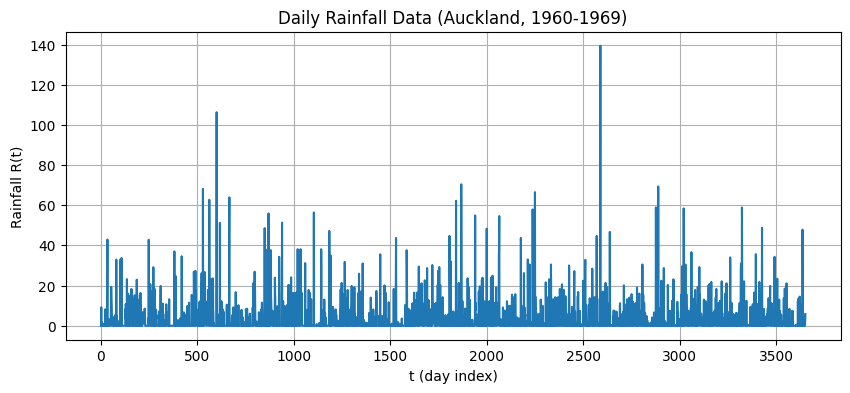

In [48]:
plt.figure(figsize=(10,4))
plt.plot(t, R_data)
plt.xlabel("t (day index)")
plt.ylabel("Rainfall R(t)")
plt.title("Daily Rainfall Data (Auckland, 1960-1969)")
plt.grid(True)
plt.show()


In [49]:
omega = 2*np.pi/365

X = np.column_stack([
    np.sin(omega*t),
    np.ones_like(t)
])

theta, residuals, rank, s = np.linalg.lstsq(X, R_data, rcond=None)
a, b = theta

R_fit = a*np.sin(omega*t) + b

print("Least Squares parameters:")
print("a =", a)
print("b =", b)
print("R_fit min/max:", R_fit.min(), R_fit.max())


Least Squares parameters:
a = -0.0436508997932905
b = 3.3923904335923383
R_fit min/max: 3.3487399380178955 3.436040929166781


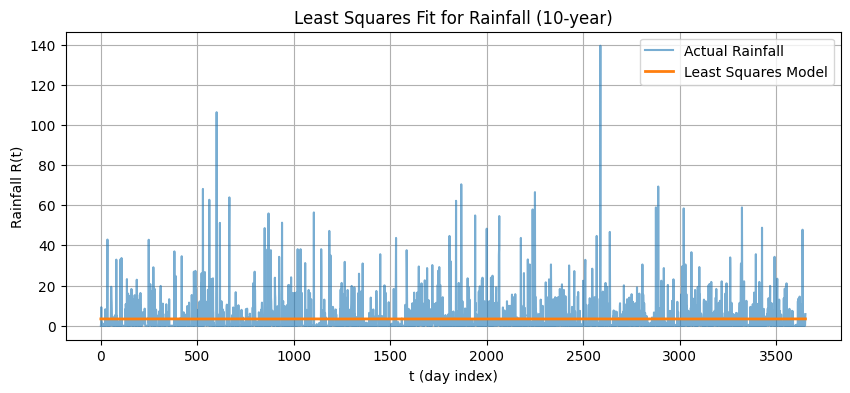

In [50]:
plt.figure(figsize=(10,4))
plt.plot(t, R_data, label="Actual Rainfall", alpha=0.6)
plt.plot(t, R_fit, label="Least Squares Model", linewidth=2)
plt.xlabel("t (day index)")
plt.ylabel("Rainfall R(t)")
plt.title("Least Squares Fit for Rainfall (10-year)")
plt.legend()
plt.grid(True)
plt.show()


In [51]:

k = 0.01
c = 0.10

def R_model(t_val):
    return a*np.sin(omega*t_val) + b

def f(t_val, h_val):
    return R_model(t_val) - (k*h_val + c)


In [52]:
def euler(f, t0, h0, dt, n):
    t_vals = np.zeros(n+1)
    h_vals = np.zeros(n+1)
    t_vals[0] = t0
    h_vals[0] = h0

    for i in range(n):
        t_vals[i+1] = t_vals[i] + dt
        h_vals[i+1] = h_vals[i] + dt * f(t_vals[i], h_vals[i])
    return t_vals, h_vals


In [53]:
def heun(f, t0, h0, dt, n):
    t_vals = np.zeros(n+1)
    h_vals = np.zeros(n+1)
    t_vals[0] = t0
    h_vals[0] = h0

    for i in range(n):
        t_i = t_vals[i]
        h_i = h_vals[i]

        k1 = f(t_i, h_i)
        h_pred = h_i + dt*k1
        k2 = f(t_i + dt, h_pred)

        t_vals[i+1] = t_i + dt
        h_vals[i+1] = h_i + (dt/2)*(k1 + k2)
    return t_vals, h_vals


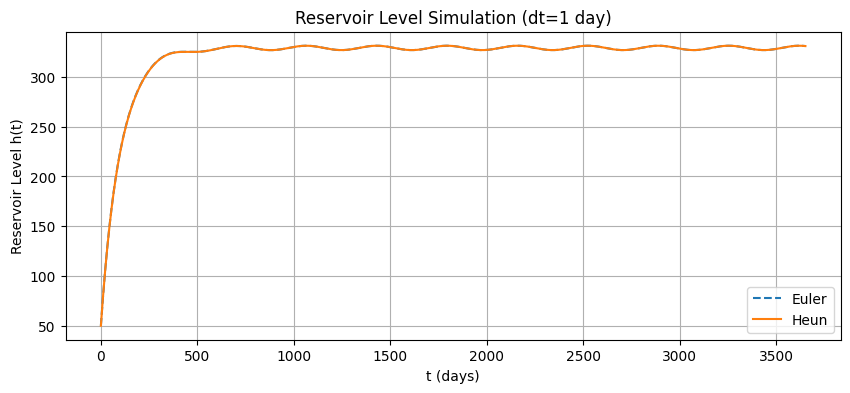

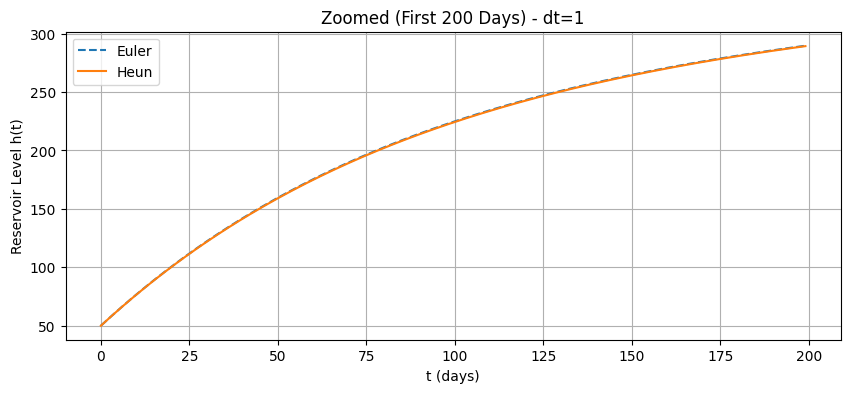

In [54]:
plt.figure(figsize=(10,4))
plt.plot(te, he, '--', label="Euler")   # <-- Euler kesikli çizgi
plt.plot(th, hh, label="Heun")
plt.xlabel("t (days)")
plt.ylabel("Reservoir Level h(t)")
plt.title("Reservoir Level Simulation (dt=1 day)")
plt.legend()
plt.grid(True)
plt.show()

Nzoom = 200
plt.figure(figsize=(10,4))
plt.plot(te[:Nzoom], he[:Nzoom], '--', label="Euler")
plt.plot(th[:Nzoom], hh[:Nzoom], label="Heun")
plt.xlabel("t (days)")
plt.ylabel("Reservoir Level h(t)")
plt.title("Zoomed (First 200 Days) - dt=1")
plt.legend()
plt.grid(True)
plt.show()



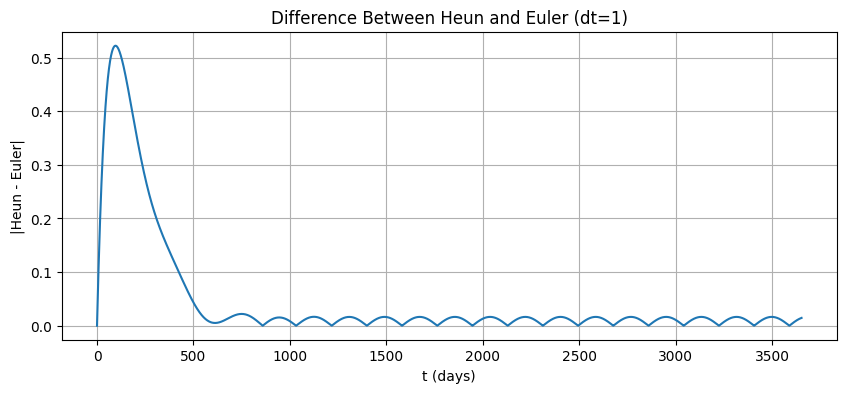

In [55]:
diff = np.abs(hh - he)

plt.figure(figsize=(10,4))
plt.plot(te, diff)
plt.xlabel("t (days)")
plt.ylabel("|Heun - Euler|")
plt.title("Difference Between Heun and Euler (dt=1)")
plt.grid(True)
plt.show()


In [44]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))


dt_ref = 0.01
T = n
n_ref = int(T / dt_ref)

t_ref, h_ref = heun(f, t0, h0, dt_ref, n_ref)


step = int(1 / dt_ref)
h_ref_sampled = h_ref[::step][:len(he)]

rmse_euler = rmse(h_ref_sampled, he)
rmse_heun  = rmse(h_ref_sampled, hh)

print("RMSE (Euler vs Reference) =", rmse_euler)
print("RMSE (Heun  vs Reference) =", rmse_heun)


RMSE (Euler vs Reference) = 0.1160211174412317
RMSE (Heun  vs Reference) = 0.0003844497784520907


dt= 2.0  RMSE_Euler=0.2327   RMSE_Heun=0.0015
dt= 1.0  RMSE_Euler=0.1160   RMSE_Heun=0.0004
dt= 0.5  RMSE_Euler=0.0579   RMSE_Heun=0.0001
dt=0.25  RMSE_Euler=2.1777   RMSE_Heun=2.1651


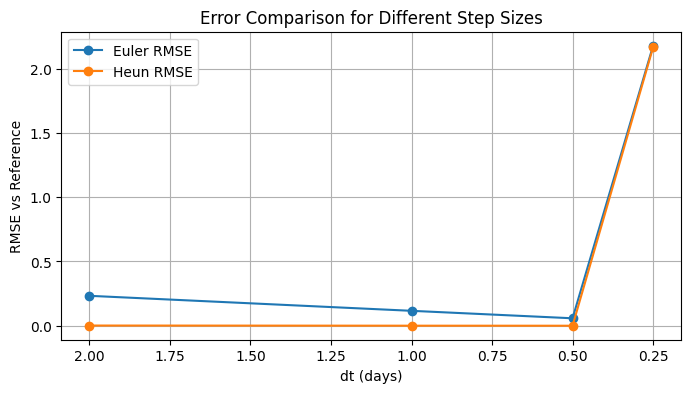

In [56]:
dts = [2.0, 1.0, 0.5, 0.25]
rmse_e_list = []
rmse_h_list = []


dt_ref = 0.02
T = n
n_ref = int(T / dt_ref)
t_ref, h_ref = heun(f, t0, h0, dt_ref, n_ref)

for dt_test in dts:
    n_test = int(T / dt_test)
    tE, hE = euler(f, t0, h0, dt_test, n_test)
    tH, hH = heun(f, t0, h0, dt_test, n_test)


    step = int(dt_test / dt_ref)
    h_ref_s = h_ref[::step][:len(hE)]

    rmse_e_list.append(rmse(h_ref_s, hE))
    rmse_h_list.append(rmse(h_ref_s, hH))


for dt_test, re, rh in zip(dts, rmse_e_list, rmse_h_list):
    print(f"dt={dt_test:>4}  RMSE_Euler={re:.4f}   RMSE_Heun={rh:.4f}")


plt.figure(figsize=(8,4))
plt.plot(dts, rmse_e_list, marker="o", label="Euler RMSE")
plt.plot(dts, rmse_h_list, marker="o", label="Heun RMSE")
plt.xlabel("dt (days)")
plt.ylabel("RMSE vs Reference")
plt.title("Error Comparison for Different Step Sizes")
plt.gca().invert_xaxis()
plt.legend()
plt.grid(True)
plt.show()


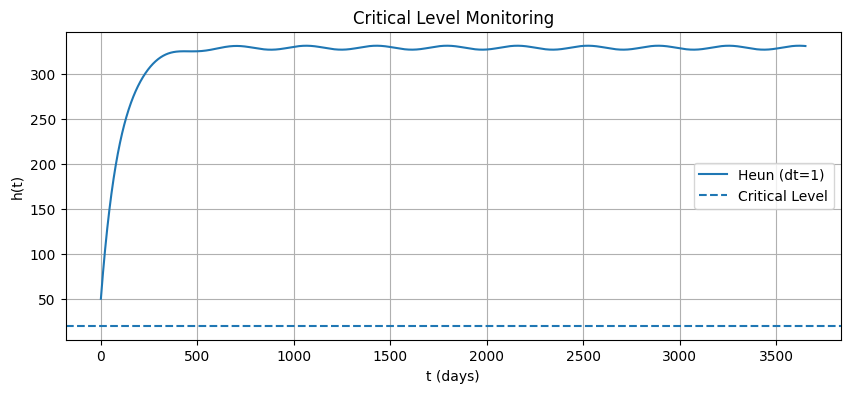

Days below critical level: 0


In [57]:
h_crit = 20  # kritik seviye

plt.figure(figsize=(10,4))
plt.plot(th, hh, label="Heun (dt=1)")
plt.axhline(h_crit, linestyle="--", label="Critical Level")
plt.xlabel("t (days)")
plt.ylabel("h(t)")
plt.title("Critical Level Monitoring")
plt.legend()
plt.grid(True)
plt.show()

days_below = np.sum(hh < h_crit)
print("Days below critical level:", days_below)
